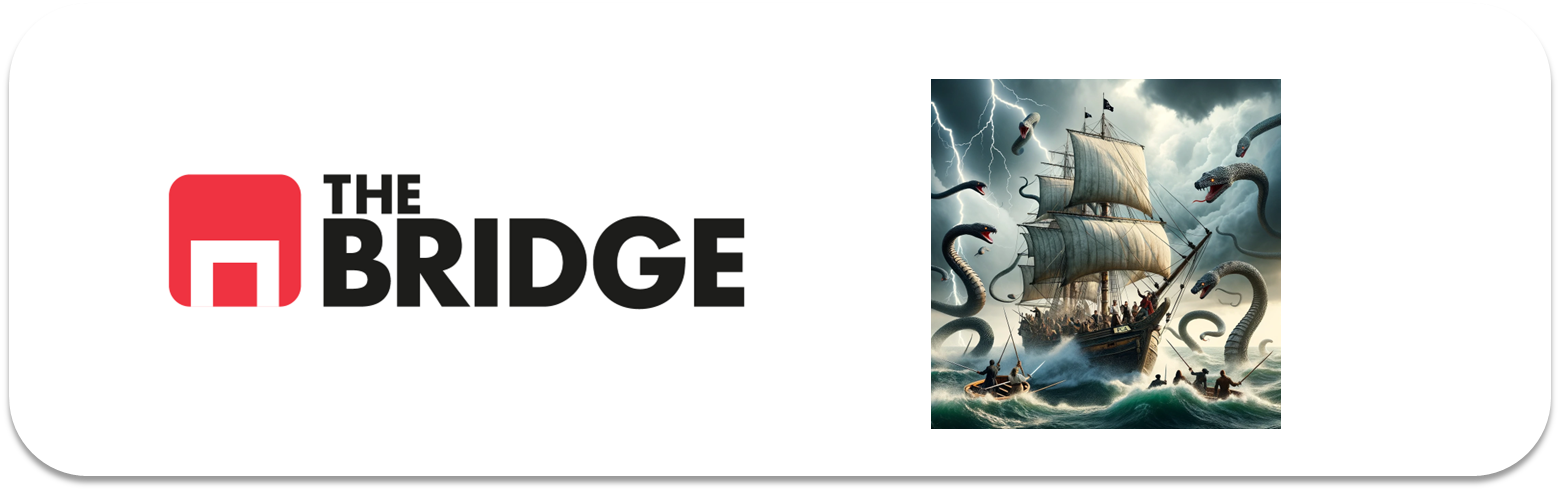

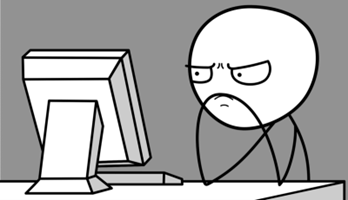

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [18]:
data = pd.read_csv("./data/nutrition.csv")
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [20]:
data.corr(numeric_only=True)[data.corr(numeric_only=True) > 0.6]

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy_kcal,NaN,1.000000,NaN,0.806795,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protein_g,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fat_g,NaN,0.806795,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carb_g,NaN,NaN,NaN,NaN,1.000000,0.615344,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sugar_g,NaN,NaN,NaN,NaN,0.615344,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber_g,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VitA_mcg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VitB6_mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,0.714143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VitB12_mcg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

*Tienen una correlación perfecta con la columna mg, así que vamos a eliminarlas.*

In [21]:
data_original = data.copy()

In [22]:
data.drop(columns = [col for col in data.columns if col.endswith("USRDA")], inplace = True)

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [23]:
data.drop(columns = [col for col in data.columns if data[col].dtype == "object"], inplace = True)
data.drop(columns = "ID", inplace = True)

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


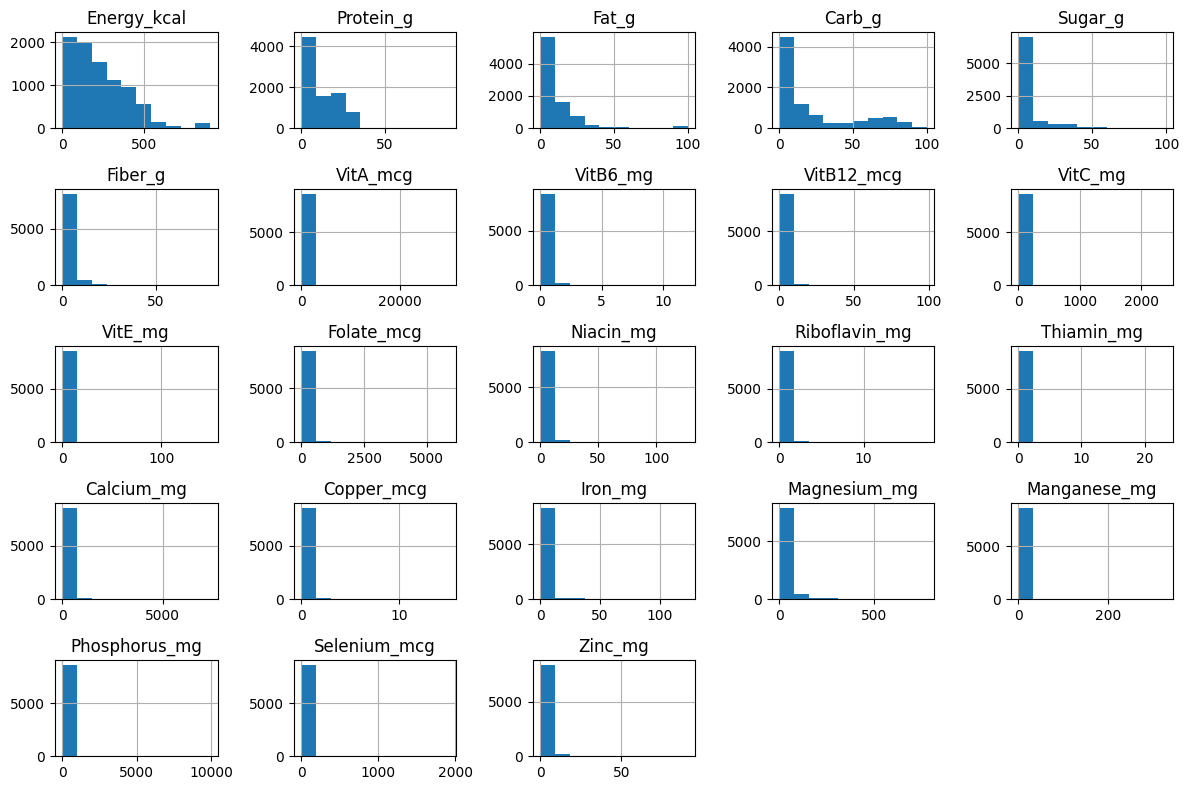

In [24]:
data.hist(figsize=(12,8))
plt.tight_layout()

In [25]:
for col in data.columns:
    data[col] = np.log10(data[col] + 1)

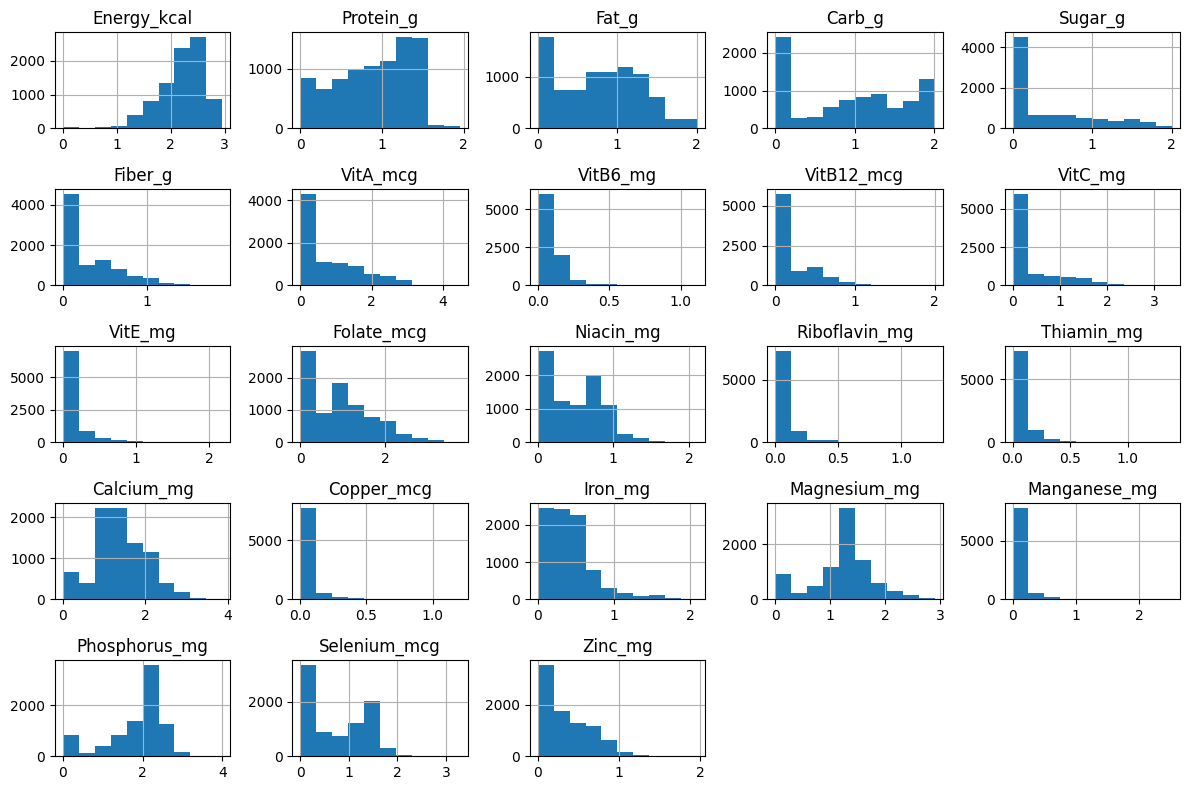

In [26]:
data.hist(figsize=(12,8))
plt.tight_layout()

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [27]:
scaler = StandardScaler()

data[data.columns] = scaler.fit_transform(data[data.columns])

In [28]:
data.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,...,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03
mean,-3.553538e-16,-1.096567e-16,9.110579e-17,-1.385138e-16,1.352158e-16,2.308563e-17,5.936305e-17,1.104812e-16,-1.978768e-16,-1.154282e-17,...,-1.063588e-16,-1.228485e-16,-7.585279e-17,3.380396e-17,-2.621868e-16,-4.782024e-17,-5.441613e-17,1.418117e-16,-2.638358e-17,-8.244868e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-5.207330e+00,-1.961806e+00,-1.510128e+00,-1.315522e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-8.238454e-01,-6.936126e-01,-6.350195e-01,...,-8.399996e-01,-7.050583e-01,-2.092453e+00,-6.242369e-01,-1.318770e+00,-2.173767e+00,-4.782942e-01,-2.480348e+00,-1.184060e+00,-1.150447e+00
25%,-5.457117e-01,-7.845487e-01,-9.263689e-01,-1.291167e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-6.835452e-01,-6.936126e-01,-6.350195e-01,...,-6.323408e-01,-5.719706e-01,-5.645306e-01,-4.784691e-01,-7.217313e-01,-3.181753e-01,-4.782942e-01,-3.635339e-01,-1.117607e+00,-8.527826e-01
50%,1.870891e-01,1.467749e-01,3.962894e-02,1.108632e-01,-5.506944e-01,-4.976256e-01,-3.927255e-01,-3.517040e-01,-5.760347e-01,-6.350195e-01,...,-1.946664e-01,-3.689783e-01,-1.045803e-01,-2.492755e-01,-1.312444e-01,1.822119e-01,-4.214700e-01,3.698432e-01,-7.599149e-02,-2.697727e-01
75%,7.643284e-01,9.180010e-01,7.773286e-01,8.723726e-01,6.428538e-01,6.756910e-01,6.811104e-01,4.418293e-01,5.772068e-01,3.544323e-01,...,2.271297e-01,2.013203e-01,6.567993e-01,4.242737e-02,4.717289e-01,4.582220e-01,4.522832e-02,6.503660e-01,9.805632e-01,7.307952e-01
max,1.775637e+00,2.288877e+00,2.397860e+00,1.550276e+00,2.811782e+00,4.530055e+00,4.212004e+00,9.862054e+00,6.340292e+00,5.512622e+00,...,1.263244e+01,1.367385e+01,3.816285e+00,1.306404e+01,5.455266e+00,2.981455e+00,1.465655e+01,2.874676e+00,4.086359e+00,5.350618e+00


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [29]:
pca = PCA()

pca.fit(data)

data_pca = pca.transform(data)

In [30]:
data_pca.shape

(8618, 23)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [33]:
pd.DataFrame(data = pca.components_, columns= data.columns)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
1,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
2,-0.522265,-0.079023,-0.473911,-0.210881,-0.184202,-0.136179,0.292311,0.159116,0.185990,0.394600,...,0.096958,-0.057955,0.093723,0.040051,-0.039002,0.073287,-0.029160,0.016400,0.062524,0.039190
3,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
4,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
5,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
6,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
7,0.006633,-0.043613,0.090748,0.000223,-0.484500,-0.066867,0.381964,-0.084649,-0.247129,-0.302244,...,0.196122,0.395320,-0.056744,-0.055444,0.003136,-0.191494,0.196760,-0.103840,0.009711,-0.317642
8,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
9,-0.295080,-0.017928,-0.318727,-0.035122,0.210174,0.101103,0.080107,0.183531,0.065568,-0.639078,...,0.088774,0.001610,0.233598,-0.020123,-0.103469,-0.016090,0.165279,-0.021910,0.085098,0.002007


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


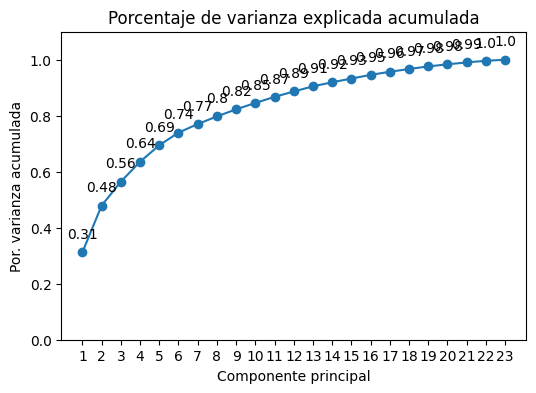

In [34]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [35]:
new_pca = PCA(6)

new_pca.fit(data)

data_reduced = new_pca.transform(data)

In [36]:
data_reduced.shape

(8618, 6)